In [58]:
%matplotlib inline
import os
import sys
import string
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from qm import*
from math import*
from random import shuffle

plt.rcParams['figure.figsize'] = (15,5)

qm = QuineMcCluskey()

In [59]:
temp = open('planet.kiss2')
line_char = temp.readlines()
l = []
entrada = []
lista_entradas = []
saida = []
lista_saidas = []

estados = []
estados = line_char[4:5]

atual = []
atual_inteiro = []
atual_convertido = []

proximo = []
proximo_inteiro = []
proximo_convertido = []

espaco_busca = []
espaco_aleatorio = []
estados_convertido = int(estados[0].split()[1])

tamanho_espaco_busca = math.ceil(np.log2(estados_convertido))


msf_pronta = []

l = line_char[5:]

for i in range(len(l)):
    entrada = l[i].split()[0]
    lista_entradas.append(entrada)
    
    atual = l[i].split()[1]
    proximo = l[i].split()[2]
    saida = l[i].split()[3]
    lista_saidas.append(saida)
    
    atual_inteiro = int(atual[2:])
    proximo_inteiro = int(proximo[2:])
    atual_convertido.append(bin(atual_inteiro)[2:].zfill(tamanho_espaco_busca))
    #atual_binario = atual_convertido[i]
    proximo_convertido.append(bin(proximo_inteiro)[2:].zfill(tamanho_espaco_busca))
    #proximo_binario = proximo_convertido[i]
    linha = entrada+atual_convertido[i]+proximo_convertido[i]+saida
    #print(linha)
    msf_pronta.append(linha)
    #print(msf_pronta[i])

#print(msf_pronta)

#-------------cria espaço de busca-----------------------------------
for i in range (tamanho_espaco_busca**2):
    espaco_busca.append(bin(i)[2:].zfill(tamanho_espaco_busca))
    #espaco_aleatorio.append(bin(i)[2:].zfill(tamanho_espaco_busca))
    
#espaco_aleatorio = espaco_busca.copy()
#shuffle(espaco_aleatorio)

#---mostra qual o estado correspondete na tabela de estados aleatorios
#def correspondente(palavra):
#    for i in range(len(espaco_busca)):
#        if palavra == espaco_busca[i]:
#            return espaco_aleatorio[i]
#
#novo_atual = []
#novo_proximo = []
#nova_msf = []

#for i in range(len(l)):
#    #print(atual_convertido[i],proximo_convertido[i])
#    novo_atual.append(correspondente(atual_convertido[i]))
#    novo_proximo.append(correspondente(proximo_convertido[i]))
#    nova_atrib = lista_entradas[i]+novo_atual[i]+novo_proximo[i]+lista_saidas[i]
#    nova_msf.append(nova_atrib)
    

    
def calculo_peso(lista_1):
    contador_implicante = 0
    contador_termo = 0
    #tamanho_calculo = len(tamanho_espaco_busca)+len(saida)
    #para_calculo = lista_l[:tamanho_calculo]
    for i in range(len(lista_1)):
        contador_termo += 1
        for j in range(len(lista_1[i])):
            if (lista_1[i][j] == '1'):
                contador_implicante += 1
    return contador_implicante+contador_termo

def prepara_lista(lista):
    tamanho_calculo = len(entrada)+len(atual_convertido[1])
    para_calculo = []
    #print(len(entrada),len(atual_convertido[1]),len(proximo_convertido[1]),len(saida), len(lista[1]))
    for i in range(len(lista)):
        para_calculo.append(lista[i][tamanho_calculo:])
    return calculo_peso(para_calculo)

#for i in range(len(lista_saidas)):
#    print(lista_saidas[i])

#print(prepara_lista(msf_pronta),prepara_lista(nova_msf))
#qm.simplify_los(msf_pronta)
#primeira_simplificada = list(qm.simplify_los(msf_pronta))
#segunda_simplificada = list(qm.simplify_los(nova_msf))
#print(prepara_lista(primeira_simplificada),prepara_lista(segunda_simplificada))
#print(primeira_simplificada)
#for i in range(len(l)):
#    print(msf_pronta[i],"-->",nova_msf[i])

#print(len(atual_convertido[1]))
#for i in range(len(l)):
#    print(linha[i])

In [62]:
for i in range (tamanho_espaco_busca**2):
        espaco_busca.append(bin(i)[2:].zfill(tamanho_espaco_busca))
        #espaco_aleatorio.append(bin(i)[2:].zfill(tamanho_espaco_busca))
def cria_nova_msf():
    #print(tamanho_espaco_busca)
    espaco_aleatorio = espaco_busca.copy()
    shuffle(espaco_aleatorio)
    return set(espaco_aleatorio)
#for i in range(10):
#    print(i)
#    print(cria_nova_msf())
    #print(lista)
nova_msf = []
def correspondente(palavra):
    espaco_aleatorio = list(cria_nova_msf())
    for i in range(len(espaco_busca)):
        if palavra == espaco_busca[i]:
            return espaco_aleatorio[i]

def nova_maquina():
    novo_atual = []
    novo_proximo = []
    nova_msf = []
    nova_atrib = []
    for i in range(len(l)):
        #print(atual_convertido[i],proximo_convertido[i])
        novo_atual.append(correspondente(atual_convertido[i]))
        novo_proximo.append(correspondente(proximo_convertido[i]))
        nova_atrib = str(lista_entradas[i])+str(novo_atual[i])+str(novo_proximo[i])+str(lista_saidas[i])
        nova_msf.append(nova_atrib)    
    return  set(nova_msf)

nova_msf = list(nova_maquina())
#print(nova_msf)

#print(len(msf_pronta),"->",len(nova_msf))    
#for i in range(len(nova_msf)):
#    print(msf_pronta[i],"->",nova_msf[i])

teste = list(qm.simplify_los(msf_pronta))
print(prepara_lista(teste))

962


In [61]:
#teste lista

teste = []
teste = nova_maquina()
nova_solucao = []

temperatura_final = 1
#print(melhor)
#for i in range(10):
#    nova_solucao = nova_maquina()
#    #print(i)
#    #print(len(nova_solucao))
#    nova_solucao_simplificada = list(qm.simplify_los(nova_solucao))
#    print(prepara_lista(melhor),"->",prepara_lista(nova_solucao_simplificada))
#    print("nova:",nova_solucao_simplificada)
#    if(prepara_lista(nova_solucao_simplificada) < prepara_lista(melhor)):
#        melhor = nova_solucao_simplificada
#    print("melhor:",melhor)

def simulated_annealing(temperatura):
    melhor = list(qm.simplify_los(msf_pronta))
    historico = [prepara_lista(melhor)]
    while temperatura > temperatura_final:
        for i in range(10):
            nova_solucao = nova_maquina()
            #np.warnings.filterwarnings('ignore')
            nova_solucao_simplificada = list(qm.simplify_los(nova_solucao))
            probabilidade = np.random.normal()
            if (prepara_lista(nova_solucao_simplificada) - prepara_lista(melhor)) < 0  or probabilidade < (np.log(-(prepara_lista(nova_solucao_simplificada)) - (prepara_lista(melhor)))/temperatura):
                melhor = nova_solucao_simplificada
                historico.append(prepara_lista(melhor))
        temperatura = temperatura-1
    return melhor, historico

/home/reinaldo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log


['0-01101', '-001010', '1-11011', '1000011', '0-10101', '110-010', '010100-', '0-00001']
[27, 23, 20, 19]


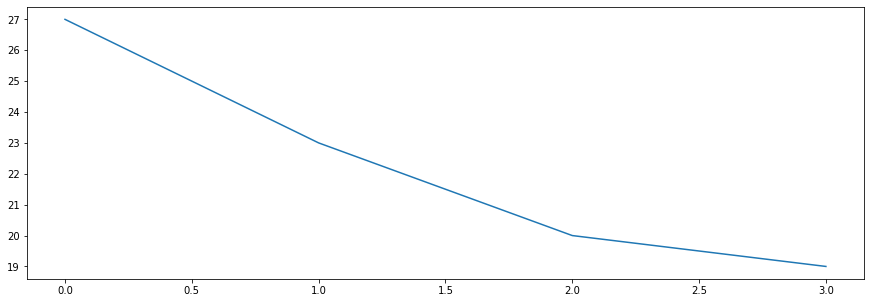

In [14]:
temperatura = 100
resultado, historico = simulated_annealing(temperatura)
print(resultado)
print(historico)
plt.plot(historico)
#plt.plot(historico, hv(historico))